# Catching zeros in the `gs-fg` files

In [1]:
import os
import sys
os.chdir('/Users/ddeal/JWST-Treasure-Chest/')
sys.path.append('/Users/ddeal/JWST-FGS-Spelunker/JWST-FGS-spk-main/src/')

In [2]:
import spelunker

spk = spelunker.load(pid=1534, save=True) # Calling the load method without the pid initializes the class

Current working directory for spelunker: /Users/ddeal/JWST-Treasure-Chest/spelunker_outputs

INFO: Found cached file ./mastDownload/JWST/jw01534001001_03101_00001_guider1/jw01534001001_gs-fg_2022340000825_cal.fits with expected size 9388800. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01534001001_03101_00001_guider1/jw01534001001_gs-fg_2022340002102_cal.fits with expected size 7827840. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01534001002_03101_00001_guider1/jw01534001002_gs-fg_2022340003651_cal.fits with expected size 8772480. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01534001003_03101_00001_guider1/jw01534001003_gs-fg_2022340005224_cal.fits with expected size 8772480. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01534001004_03101_00001_guider1/jw01534001004_gs-fg_2022340010755_cal.fits with expected size 8766720. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01534002001_05101_000

In [18]:
spk.gauss2d_fit(spk.fg_array[0:47000], ncpus=6)

2023-07-21 10:40:47,532	INFO worker.py:1636 -- Started a local Ray instance.
(ray_curve_fit pid=92821) /Users/ddeal/miniconda/envs/stenv/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
(ray_curve_fit pid=92821)   warnings.warn('Covariance of the parameters could not be estimated',


A runtime error has occured with fitting. Logging nan.
A runtime error has occured with fitting. Logging nan.


amplitude,x_mean,y_mean,x_stddev,y_stddev,theta,offset
float64,float64,float64,float64,float64,float64,float64
280706.185634385,3.177429455049692,2.7465302493949086,0.6140089150213697,0.635097561595273,-0.3395663387208495,3023.1077276661226
280963.62065334414,3.177604526211666,2.7483596871343785,0.6193384279222812,0.6306453881925744,-0.4871862108794263,3149.3271170103994
282706.5955995564,3.176486261928629,2.749817730396151,0.6145494294528495,0.6334273016475618,-0.3796342935981447,3053.0978741076683
277126.3271997859,3.1748827566185454,2.747749615357118,0.6189797760208593,0.6340117080713599,-0.34290711246111044,3105.682007065129
280742.48991882964,3.1719032854204396,2.7566361012623593,0.6154033149827007,0.6363143253758646,-0.4290707367921116,3017.8030072750075
285318.686022621,3.1741194909097623,2.755511378419066,0.6129156149472791,0.6333455386847349,-0.46764204548813865,3140.7977213174113
284005.2661280344,3.1746818749572987,2.7509172302224054,0.6164236897005667,0.6309421400491299,-0.5182101234043293,3141.3593304085134
282250.4668426101,3.1758976062955924,2.758748680528338,0.6150586798148445,0.6306363451639153,-0.3946686054724469,3076.8896120854765
284216.99007356766,3.1711342707680306,2.7558168017534155,0.6153531165663727,0.6321715647217392,-0.23842245899272627,3135.1570217638464


In [32]:
spk.quick_fit(spk.fg_array[0:47000])

/Users/ddeal/JWST-FGS-Spelunker/JWST-FGS-spk-main/src/spelunker.py:678: RuntimeWarning: invalid value encountered in sqrt
  return centroid, np.sqrt(variance)


amplitude,x_mean,y_mean,x_stddev,y_stddev,theta,offset
float32,float64,float64,float64,float64,int64,int64
254451.56,3.240314850861845,2.8033942297495758,1.74462175414244,1.8158228238188503,0,0
255055.25,3.3206004778017384,2.8434574303565463,1.8543257785557397,1.8293394846671764,0,0
256947.42,3.3505845162736376,2.925690858450849,1.8077292667969422,1.8943471255043283,0,0
251888.12,3.3039389301600726,2.886233231270987,1.854677926018813,1.8433178905598915,0,0
257109.62,3.2835164773971806,2.774318082677534,1.837107063709473,1.7647732623026264,0,0
260538.05,3.3179275932309764,2.9873321297227244,1.823778252167423,1.915250089927635,0,0
258240.39,3.3274251121724663,2.9174551798970447,1.7992721838997272,1.8034998313019452,0,0
257812.42,3.337006784401431,2.9480330430536883,1.794200708048935,1.8579627581629952,0,0
259528.89,3.175704786711144,3.1020009390505416,1.8233069521122187,1.9829830781066773,0,0


In [33]:
spk.quickfit_results

amplitude,x_mean,y_mean,x_stddev,y_stddev,theta,offset
float32,float64,float64,float64,float64,int64,int64
254451.56,3.240314850861845,2.8033942297495758,1.74462175414244,1.8158228238188503,0,0
255055.25,3.3206004778017384,2.8434574303565463,1.8543257785557397,1.8293394846671764,0,0
256947.42,3.3505845162736376,2.925690858450849,1.8077292667969422,1.8943471255043283,0,0
251888.12,3.3039389301600726,2.886233231270987,1.854677926018813,1.8433178905598915,0,0
257109.62,3.2835164773971806,2.774318082677534,1.837107063709473,1.7647732623026264,0,0
260538.05,3.3179275932309764,2.9873321297227244,1.823778252167423,1.915250089927635,0,0
258240.39,3.3274251121724663,2.9174551798970447,1.7992721838997272,1.8034998313019452,0,0
257812.42,3.337006784401431,2.9480330430536883,1.794200708048935,1.8579627581629952,0,0
259528.89,3.175704786711144,3.1020009390505416,1.8233069521122187,1.9829830781066773,0,0


In [21]:
spk.gaussfit_results

amplitude,x_mean,y_mean,x_stddev,y_stddev,theta,offset
float64,float64,float64,float64,float64,float64,float64
nan,3.177429455049692,2.7465302493949086,0.6140089150213697,0.635097561595273,-0.3395663387208495,3023.1077276661226
280963.62065334414,3.177604526211666,2.7483596871343785,0.6193384279222812,0.6306453881925744,-0.4871862108794263,3149.3271170103994
282706.5955995564,3.176486261928629,2.749817730396151,0.6145494294528495,0.6334273016475618,-0.3796342935981447,3053.0978741076683
277126.3271997859,3.1748827566185454,2.747749615357118,0.6189797760208593,0.6340117080713599,-0.34290711246111044,3105.682007065129
280742.48991882964,3.1719032854204396,2.7566361012623593,0.6154033149827007,0.6363143253758646,-0.4290707367921116,3017.8030072750075
285318.686022621,3.1741194909097623,2.755511378419066,0.6129156149472791,0.6333455386847349,-0.46764204548813865,3140.7977213174113
284005.2661280344,3.1746818749572987,2.7509172302224054,0.6164236897005667,0.6309421400491299,-0.5182101234043293,3141.3593304085134
282250.4668426101,3.1758976062955924,2.758748680528338,0.6150586798148445,0.6306363451639153,-0.3946686054724469,3076.8896120854765
284216.99007356766,3.1711342707680306,2.7558168017534155,0.6153531165663727,0.6321715647217392,-0.23842245899272627,3135.1570217638464


(59918.999, 59918.99969969553)

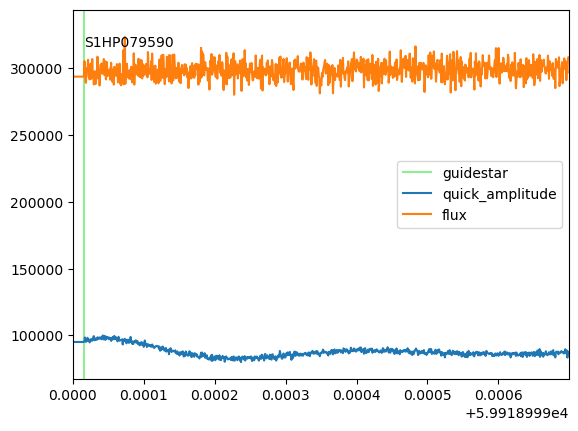

In [78]:
import matplotlib.pyplot as plt

ax = spk.mnemonics_local('GUIDESTAR')
plt.plot(spk.fg_time[46000:47000],spk.quickfit_results['amplitude'][46000:47000], label='quick_amplitude')
plt.plot(spk.fg_time[46000:47000],spk.fg_flux[46000:47000], label='flux')
plt.legend()
plt.xlim(59918.99900, spk.fg_time[47000])

(-10000000.0, 2000000.0)

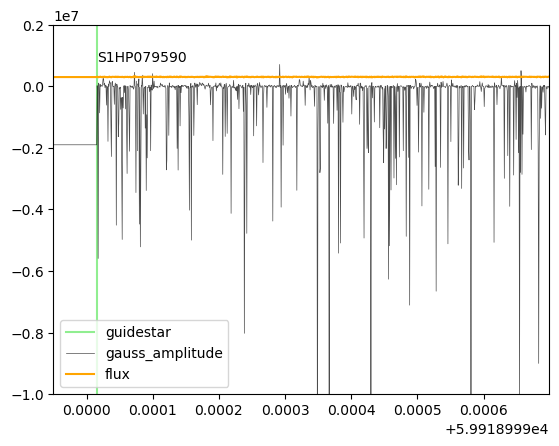

In [104]:
import matplotlib.pyplot as plt

ax = spk.mnemonics_local('GUIDESTAR')
plt.plot(spk.fg_time[46000:47000],spk.gaussfit_results['amplitude'][46000:47000], color='black', alpha=0.7, linewidth=0.5, label='gauss_amplitude')
plt.plot(spk.fg_time[46000:47000],spk.fg_flux[46000:47000], color='orange', label='flux')
plt.legend()
plt.xlim(59918.99895, spk.fg_time[47000])
plt.ylim(-10000000,2000000)

(1.0, 5.0)

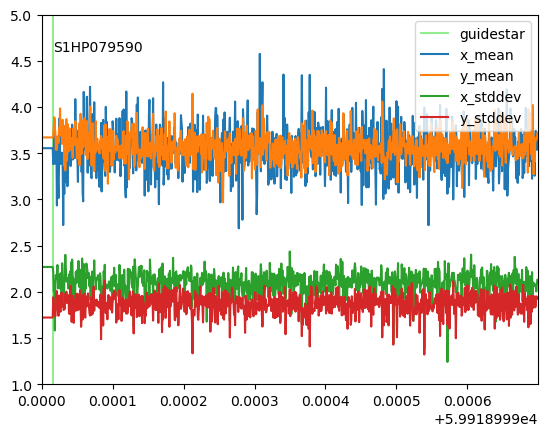

In [76]:
ax = spk.mnemonics_local('GUIDESTAR')

plt.plot(spk.fg_time[45000:47000],spk.quickfit_results['x_mean'][45000:47000],label='x_mean')
plt.plot(spk.fg_time[45000:47000],spk.quickfit_results['y_mean'][45000:47000],label='y_mean')
plt.plot(spk.fg_time[45000:47000],spk.quickfit_results['x_stddev'][45000:47000],label='x_stddev')
plt.plot(spk.fg_time[45000:47000],spk.quickfit_results['y_stddev'][45000:47000],label='y_stddev')

plt.legend()
plt.xlim(59918.99900, spk.fg_time[47000])
plt.ylim(1,5)

In [23]:
import numpy as np

np.where(np.isnan(spk.gaussfit_results['amplitude']))

(array([    0, 46159, 46203]),)

In [19]:
spk.tester[-1]

46158

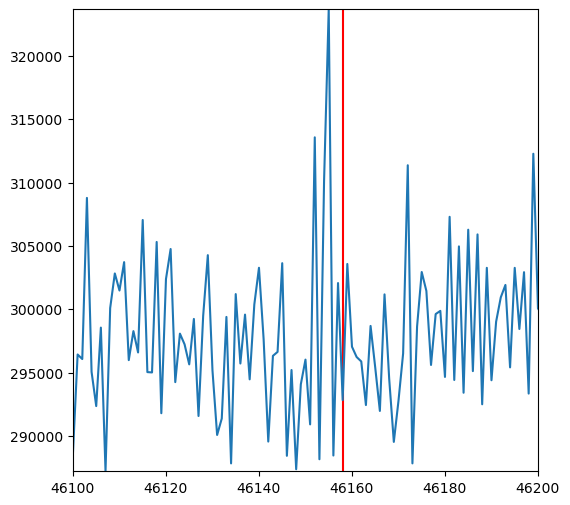

In [3]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(6,6))

ax.axvline(46158, color='red')
ax.set_xlim(46100,46200)
ax.set_ylim(np.min(spk.fg_flux[46100:46200]),np.max(spk.fg_flux[46100:46200]))
ax.plot(spk.fg_flux)
#spk.flux_spatial_timelapse_animation(start=46148, stop=46168,)


In [4]:
test_array = spk.fg_array #46158

In [5]:
import numpy as np
np.any(spk.fg_array == 0)

sky_section_1 = np.nanmedian(test_array[:,0,7])
sky_section_2 = np.nanmedian(test_array[:,7,0])
sky_section_3 = np.nanmedian(test_array[:,0,0])
sky_section_4 = np.nanmedian(test_array[:,7,7])

In [6]:
med_skypix = np.nanmean([sky_section_1, sky_section_2, sky_section_3, sky_section_4])

In [7]:
idx ,x,y = np.where(test_array <= 0)

In [8]:
pix_dead  = np.array([i for i in zip(idx,x,y)])

In [9]:
test_array[0][x,y]

array([ 364.05234,  364.05234,  872.751  , ..., 1560.8275 , 1023.3553 ,
        842.4786 ], dtype=float32)

In [10]:
for i in zip(idx,x,y):
    test_array[i[0]][i[1],i[2]] = med_skypix

In [11]:
print(np.where(test_array <= 0))

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))


In [226]:
spk.gauss2d_fit(test_array/np.nanmedian(test_array), ncpus=6)

(ray_curve_fit pid=86318) /Users/ddeal/miniconda/envs/stenv/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
(ray_curve_fit pid=86318)   warnings.warn('Covariance of the parameters could not be estimated',
2023-07-20 19:53:51,389	ERROR services.py:1207 -- Failed to start the dashboard 
2023-07-20 19:53:51,392	ERROR services.py:1232 -- Error should be written to 'dashboard.log' or 'dashboard.err'. We are printing the last 20 lines for you. See 'https://docs.ray.io/en/master/ray-observability/ray-logging.html#logging-directory-structure' to find where the log file is.
2023-07-20 19:53:51,393	ERROR services.py:1242 -- Couldn't read dashboard.log file. Error: [Errno 2] No such file or directory: '/tmp/ray/session_2023-07-20_19-53-29_427625_72354/logs/dashboard.log'. It means the dashboard is broken even before it initializes the logger (mostly dependency issues). Reading the dashboard.err file which contain

KeyboardInterrupt: 

In [ ]:
spk.tester

In [14]:
test_array/np.nanmedian(test_array)

array([[[ 0.2716387 ,  0.5214106 ,  0.9713408 , ...,  0.6067732 ,
          0.37239355,  0.18146278],
        [ 0.49613762,  0.98615533,  2.5992131 , ...,  1.4772041 ,
          0.53761727,  0.15402052],
        [ 0.60951227,  1.8602945 ,  6.348883  , ...,  2.4990633 ,
          0.72610617,  0.26092568],
        ...,
        [ 0.27682942,  0.43769282,  0.86438257, ...,  0.73187494,
          0.38348225,  0.14869481],
        [ 0.13059354,  0.36078084,  0.4132653 , ...,  0.45613295,
          0.25704417,  0.12397234],
        [ 0.12386182,  0.21921569,  0.19404764, ...,  0.21469346,
          0.21161194,  0.09144188]],

       [[ 0.33900508,  0.5523243 ,  0.9641228 , ...,  0.6557066 ,
          0.4109586 ,  0.2979574 ],
        [ 0.4813904 ,  0.99908864,  2.7103813 , ...,  1.3276573 ,
          0.57473844,  0.26371858],
        [ 0.6643124 ,  1.991483  ,  6.9142237 , ...,  2.2724123 ,
          0.8539417 ,  0.33424363],
        ...,
        [ 0.30550504,  0.48831752,  0.7937359 , ...,  

In [144]:
1 - ((len(test_array) - len(pix_dead) ) /  len(test_array))

0.11018739198698757

In [150]:
test_array[18472][7,:]

array([211.97647 , 189.17885 , -12.842518,  64.031166,  86.310814,
       128.22496 , 380.72348 ,   0.      ], dtype=float32)

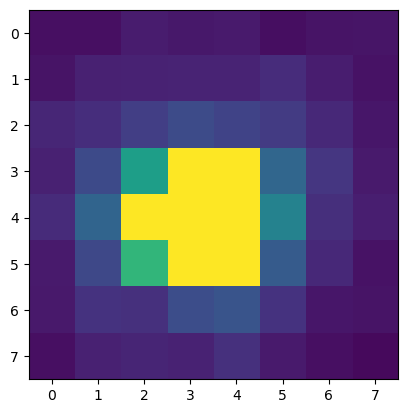

In [149]:
test_array = spk.fg_array #46158
plt.imshow(test_array[46158], vmin=-100, vmax=10000)